In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sample-sales-data/sales_data_sample.csv


This is the post about **Introduction to Data Scinece**, I am going to write about* handling tabular/dataframe* data in python3. 

### Plotting
-----
In this section we will learn about **Bivariate** plot. 

In this section we will use this sales data https://www.kaggle.com/kyanyoga/sample-sales-data 

### Import Data

In [7]:
df = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding='unicode_escape')
print(df.shape)
display(df.head())

(2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Scatter plot: 
Lets find the relationship between order amount and price of products. 

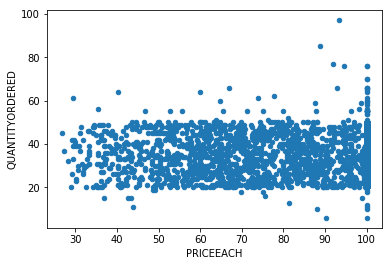

In [6]:
import matplotlib.pyplot as plt 

df.plot(kind='scatter', x='PRICEEACH', y='QUANTITYORDERED')
plt.show()

The graph shows that the market in which this firm is operating favors products in the price range of 60-80, as that part of the plot is very dense

### Barplot 
A bar plot is similar to a histogram, but it is a bivariate plot. The length of the bars represents the quantity on the y-axis. Bar plot usually used by groupby. 

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64


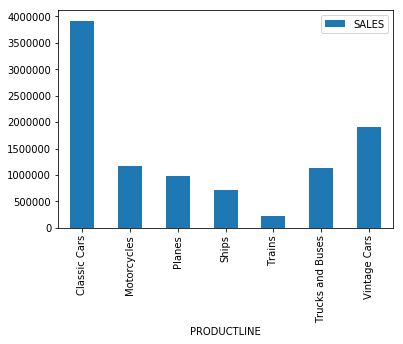

In [12]:
#print the product line 
print(df['PRODUCTLINE'].value_counts())

new_df = df.groupby('PRODUCTLINE').sum()
new_df.plot(kind='bar', y='SALES')
plt.show()

Bar plot by using two variable.

ORDERNUMBER                                        \
PRODUCTLINE Classic Cars Motorcycles   Planes    Ships  Trains   
YEAR_ID                                                          
2003             3720779     1106717   862535   822371  284301   
2004             4545942     1686293  1656322  1182561  380664   
2005             1652216      602495   623699   394924  124689   

                                          QUANTITYORDERED                     \
PRODUCTLINE Trucks and Buses Vintage Cars    Classic Cars Motorcycles Planes   
YEAR_ID                                                                        
2003                 1117147      2244249           12473        3739   2996   
2004                 1461309      2921673           15418        5690   5524   
2005                  509438      1060057            6101        2234   2207   

             ... MONTH_ID                                       MSRP  \
PRODUCTLINE  ...   Trains Trucks and Buses Vintage Cars Classic Cars   
YEAR_ID      ...                                                       
2003         ...      226              896         1769        43634   
2004         ...      290             1156         2212        53370   
2005         ...       33              158          301        18925   

                                                                           
PRODUCTLINE Motorcycles Planes Ships Trains Trucks and Buses Vintage Cars  
YEAR_ID                                                                    
2003              10662   7544  6975   2042            11290        19442  
2004              15750  14274  9903   2698            14555        24301  
2005               5718   5345  3276    880             4997         8739  

[3 rows x 56 columns]

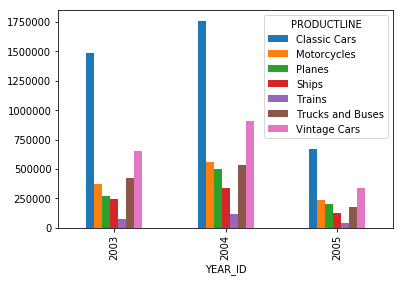

In [25]:
new_df = df.groupby(['YEAR_ID', 'PRODUCTLINE']).sum()

#display(new_df)
#display(new_df.unstack())

new_df.unstack().plot(kind='bar', y='SALES')
plt.show()

we have used the unstack function. unstack, changes the hierarchical structure of the grouped dataframe into tabular structure. If we had plotted without using unstack then the bars for a single year would not have been grouped together as they are in the plot.